## Proyecto Final Modelado Predictivo


### Integrantes:

##### Guerrero Paisano Jesedh.
##### Huerta Ramírez Michel Adolfo.
##### Maravilla Perez Vianey.
##### Mondolla Cervantes Erin.
##### Perea Samaniego Jesus Giovanni.

### Preguntas a resolver: 


1.  ¿Que posicion en el top de ventas tendre al introducir un nuevo producto, dado su precio y su margen de utilidad?
2.  ¿Que variables son importantes en una tienda para tener buenos ingresos?
3.  ¿Cuáles son los 20 mejores productos en cuestión de utilidades y ventas en el estado de Puebla?

### Analísis exploratorio de datos

In [165]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.linear_model import LinearRegression



In [166]:
inventory_data_dictionary = pd.read_csv('./Data Dictionary/inventory_data_dictionary.csv')
products_data_dictionary = pd.read_csv('./Data Dictionary/products_data_dictionary.csv')
sales_data_dictionary = pd.read_csv('./Data Dictionary/sales_data_dictionary.csv')
stores_data_dictionary = pd.read_csv('./Data Dictionary/stores_data_dictionary.csv')

In [167]:
inventory = pd.read_csv('inventory.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')
stores = pd.read_csv('stores.csv')

In [168]:
#¿Cuantos registros de productos existen en el dataset?
products = pd.read_csv('./products.csv')
print('¿Cuantos registros de productos existen en el dataset?')
print(products.shape[0])
print('')
#¿Cuantos registros de ventas existen en el dataset?
sales = pd.read_csv('./sales.csv')
print('¿Cuantos registros de ventas existen en el dataset?')
print(sales.shape[0])
print('')  
#¿Cuantos registros de inventario existen en el dataset?
inventory = pd.read_csv('./inventory.csv')
print('¿Cuantos registros de inventario existen en el dataset?')
print(inventory.shape[0])
print('')
#¿Cuantos registros de tiendas existen en el dataset?
stores = pd.read_csv('./stores.csv')
print('¿Cuantos registros de tiendas existen en el dataset?')
print(stores.shape[0])

¿Cuantos registros de productos existen en el dataset?
35

¿Cuantos registros de ventas existen en el dataset?
829262

¿Cuantos registros de inventario existen en el dataset?
1593

¿Cuantos registros de tiendas existen en el dataset?
50


In [169]:
#¿Cual es la temporada con mas ventas?
# Convertir la columna de fecha a datetime y extraer el trimestre
sales['Quarter'] = pd.to_datetime(sales['Date']).dt.quarter

# Agrupar los datos por trimestre y sumar las ventas
quarterly_sales = sales.groupby('Quarter')['Units'].sum()

print('De quartely_sales, ¿Cual es el trimestre con mas ventas?')

# Imprimir el resultado
print(quarterly_sales)

De quartely_sales, ¿Cual es el trimestre con mas ventas?
Quarter
1    295320
2    334909
3    295259
4    165077
Name: Units, dtype: int64


In [170]:
#unir los datasets sales.csv y products.csv por la columna Product_ID
sales_products = pd.merge(products, sales, on='Product_ID')

In [171]:
#sumar las ventas por Product_Name y ordenar de mayor a menor
sales_by_product = sales_products.groupby('Product_Name')['Units'].sum().sort_values(ascending=False)

In [172]:
#agregar nombre a la columna sales_by_product Product_Name y Units y ordenar de mayor a menor
sales_by_product = sales_products.groupby('Product_Name')['Units'].sum().sort_values(ascending=False).reset_index(name='Units')

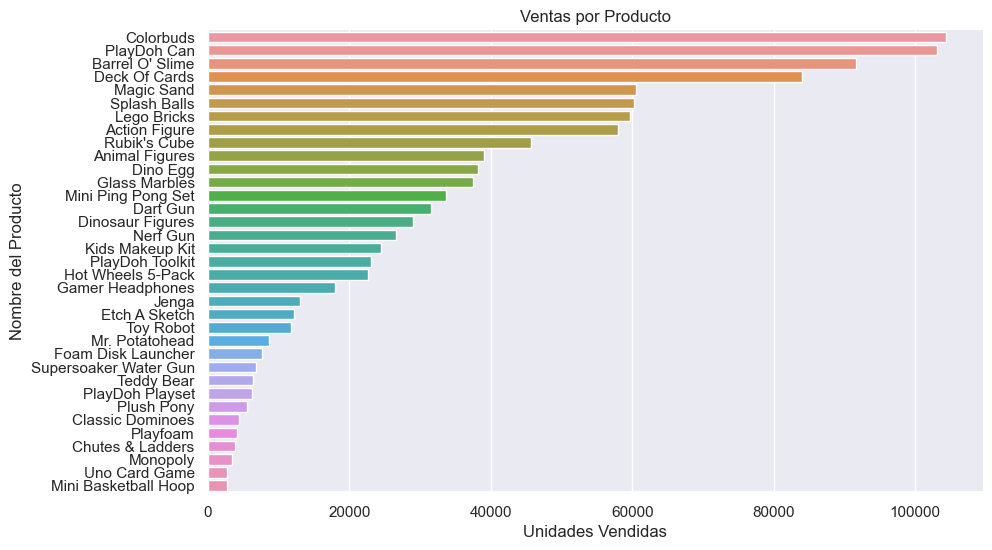

In [173]:
# Select the column names representing units sold and product name
units_sold = sales_by_product['Units']
product_names = sales_by_product['Product_Name']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=units_sold, y=product_names)
plt.title('Ventas por Producto')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Nombre del Producto')

# Customize the plot appearance
sns.set(style='whitegrid')
sns.despine()

# Show the plot
plt.show()

# PRIMER HALLAZGO

### ¿Que posicion en top de ventas tendre al introducir un nuevo producto , dado su precio y su margen de utilidad?

Ejemplo: Queremos saber que tan vendido sera un nuevo __Patin del diablo__ con un precio de __$300.00__ pesos y un márgen de utilidad del __60%__ que quiere decir que el costo de producción del producto sería de __$187.50__ pesos.

In [174]:
products.head(3)

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99


In [175]:
#Reemplazar $ por vacio en la columna Product_Cost y Product_Price
products['Product_Cost'] = products['Product_Cost'].str.replace('$', '')
products['Product_Price'] = products['Product_Price'].str.replace('$', '')


#Convertir las columnas Product_Cost y Product_Price a numericas
products['Product_Cost'] = pd.to_numeric(products['Product_Cost'], errors='coerce')
products['Product_Price'] = pd.to_numeric(products['Product_Price'], errors='coerce')



C:\Users\Adolfo\AppData\Local\Temp\ipykernel_13820\3036117453.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  products['Product_Cost'] = products['Product_Cost'].str.replace('$', '')
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_13820\3036117453.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  products['Product_Price'] = products['Product_Price'].str.replace('$', '')


In [176]:
#En la tabla products , crear una nueva columna llamada "Utilities" que sea el resultado de la resta de las columnas Product_Price y Product_Cost
products['Utilities'] = (products['Product_Price']) - (products['Product_Cost'])
GrupoUtilidades = products

#Crear una columna llamada "percentage" que sea el porcentaje de utilidad de cada producto
GrupoUtilidades['percentage'] = (GrupoUtilidades['Utilities'] / GrupoUtilidades['Product_Price']) * 100

GrupoUtilidades.head(10)

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Utilities,percentage
0,1,Action Figure,Toys,9.99,15.99,6.0,37.523452
1,2,Animal Figures,Toys,9.99,12.99,3.0,23.094688
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99,2.0,50.125313
3,4,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688
4,5,Classic Dominoes,Games,7.99,9.99,2.0,20.020020
5,6,Colorbuds,Electronics,6.99,14.99,8.0,53.368913
6,7,Dart Gun,Sports & Outdoors,11.99,15.99,4.0,25.015635
7,8,Deck Of Cards,Games,3.99,6.99,3.0,42.918455
8,9,Dino Egg,Toys,9.99,10.99,1.0,9.099181
9,10,Dinosaur Figures,Toys,10.99,14.99,4.0,26.684456


In [177]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Discretizar la variable objetivo en niveles de utilidades
GrupoUtilidades['utilidad_nivel'] = pd.cut(GrupoUtilidades['percentage'], bins=[0, 33, 66, 100], labels=['bajo', 'medio', 'alto'])

# Seleccionar las características y la variable objetivo
X = GrupoUtilidades[['Product_Cost', 'Product_Price', 'Utilities']]
y = GrupoUtilidades['utilidad_nivel']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de clasificación
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        alto       0.00      0.00      0.00         1
        bajo       1.00      0.67      0.80         3
       medio       0.60      1.00      0.75         3

    accuracy                           0.71         7
   macro avg       0.53      0.56      0.52         7
weighted avg       0.69      0.71      0.66         7



c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [178]:
GrupoUtilidades.head(3) 

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Utilities,percentage,utilidad_nivel
0,1,Action Figure,Toys,9.99,15.99,6.0,37.523452,medio
1,2,Animal Figures,Toys,9.99,12.99,3.0,23.094688,bajo
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99,2.0,50.125313,medio


In [179]:
#juntar sales_by_product y GrupoUtilidades por la columna Product_Name
TaskOne = pd.merge(sales_by_product, GrupoUtilidades, on='Product_Name')

In [180]:
#Crear una columna llamada ganancia que sea el resultado de multiplicar las columnas Units y Utilities
TaskOne['ganancia'] = (TaskOne['Units']) * (TaskOne['Utilities'])


In [181]:
TaskOne.head(3)

,Product_Name,Units,Product_ID,Product_Category,Product_Cost,Product_Price,Utilities,percentage,utilidad_nivel,ganancia
0,Colorbuds,104368,6,Electronics,6.99,14.99,8.0,53.368913,medio,834944.0
1,PlayDoh Can,103128,25,Art & Crafts,1.99,2.99,1.0,33.444816,medio,103128.0
2,Barrel O' Slime,91663,3,Art & Crafts,1.99,3.99,2.0,50.125313,medio,183326.0


¿Que nos conviene, introducir al mercadod productos con utilidades altas,medias o bajas?

In [182]:
# Preparar los datos

#Crear un nuevo dataset llamado TaskTwo con las columnas Produc_ID, percentage y 
TaskTwo = TaskOne[['Product_ID', 'percentage', 'Product_Price']]

#convertir la columna utilidad_nivel en numerica siendo bajo = 1, medio = 2 y alto = 3 
TaskTwo['utilidad_nivel'] = TaskOne['utilidad_nivel'].replace(['bajo', 'medio', 'alto'], [1, 2, 3])

#crear una nueva columna llamada posicion de ventas que ponga numero 1 al produco con mayor ganancia, 2 al segundo y asi sucesivamente
TaskTwo['posicion de ventas'] = TaskTwo['percentage'].rank(ascending=False)


TaskTwo.head(3)

C:\Users\Adolfo\AppData\Local\Temp\ipykernel_13820\2231271561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TaskTwo['utilidad_nivel'] = TaskOne['utilidad_nivel'].replace(['bajo', 'medio', 'alto'], [1, 2, 3])
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_13820\2231271561.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TaskTwo['posicion de ventas'] = TaskTwo['percentage'].rank(ascending=False)


,Product_ID,percentage,Product_Price,utilidad_nivel,posicion de ventas
0,6,53.368913,14.99,2,5.0
1,25,33.444816,2.99,2,13.0
2,3,50.125313,3.99,2,6.0


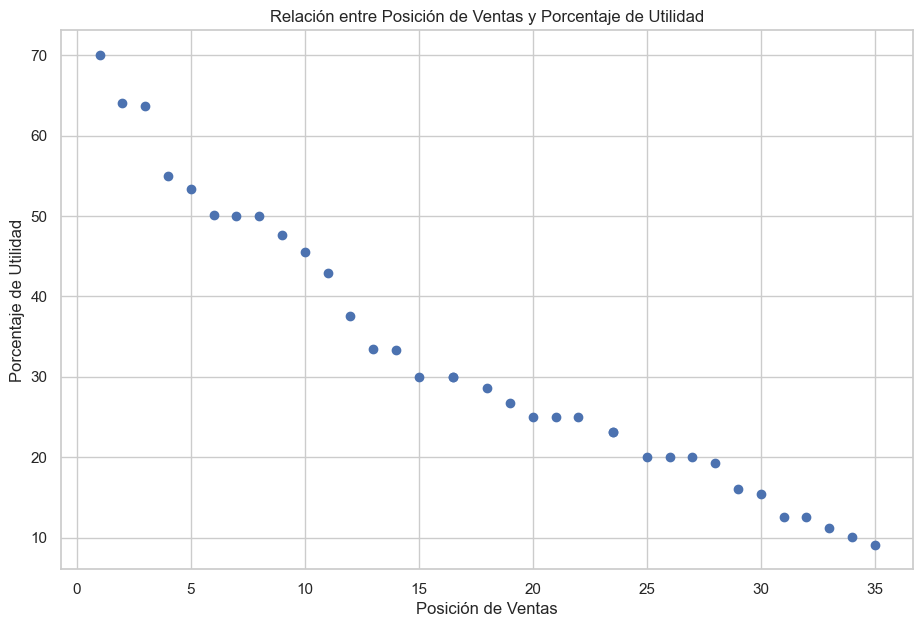

In [183]:
# Graficar la relación entre la posición de ventas y el porcentaje de utilidad
plt.scatter(TaskTwo['posicion de ventas'], TaskTwo['percentage'])
plt.xlabel('Posición de Ventas')
plt.ylabel('Porcentaje de Utilidad')
plt.title('Relación entre Posición de Ventas y Porcentaje de Utilidad')
plt.show()

In [184]:

# Cargar los datos
data = TaskTwo

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['percentage', 'Product_Price']]
y = data['posicion de ventas']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [185]:
# Crear un nuevo dato para predecir el posicionamiento promedio de ventas
new_data = pd.DataFrame({
    'percentage': [60],
    'Product_Price': [300]
})

# Realizar la predicción para el nuevo dato
predicted_posicion_ventas = model.predict(new_data)

print('Posicionamiento promedio de ventas predicho:', predicted_posicion_ventas)
# Imprimir las métricas de evaluación
print("Coeficiente de determinación (R^2):", r2)
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)


Posicionamiento promedio de ventas predicho: [31.21402705]
Coeficiente de determinación (R^2): 0.9116991874260985
Error cuadrático medio (MSE): 3.290556811427433
Error absoluto medio (MAE): 1.669670186044679


El coeficiente de determinación (R^2) de 0.911 indica que el modelo explica aproximadamente el 91% de la variabilidad en las ventas basado en las características utilizadas. Un valor cercano a 1 significa un buen ajuste del modelo a los datos.

El error cuadrático medio (MSE) de 3.29 representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales de las ventas. Un valor más bajo indica que el modelo tiene un menor error en las predicciones de ventas.

El error absoluto medio (MAE) de 1.66 es el promedio de los errores absolutos entre las predicciones del modelo y los valores reales de las ventas. Un valor más bajo indica que el modelo tiene un menor error absoluto en las predicciones de ventas.

En resumen, el modelo tiene un buen ajuste a los datos, con una alta capacidad de explicar la variabilidad en las ventas. Además, el modelo tiene un error cuadrático medio y un error absoluto medio relativamente bajos, lo que indica que las predicciones de ventas están cercanas a los valores reales en promedio.

Eso quiere decir que nuestro __patin del diablo__ va a aparecer entre el lugar 30 de ventas de 35 productos ( no le va a ir muy bien que digamos ... ) 

# SEGUNDO HALLAZGO

### ¿Que variables son importantes en una tienda para tener buenos ingresos?

In [186]:
#crear un dataset llamado rentable que sea la union de sales_products y stores por la columna Store_ID
rentable = pd.merge(sales_products, stores, on='Store_ID')
rentable.head(3)

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Sale_ID,Date,Store_ID,Units,Quarter,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Action Figure,Toys,$9.99,$15.99,2,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
1,1,Action Figure,Toys,$9.99,$15.99,171,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,1,Action Figure,Toys,$9.99,$15.99,364,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01


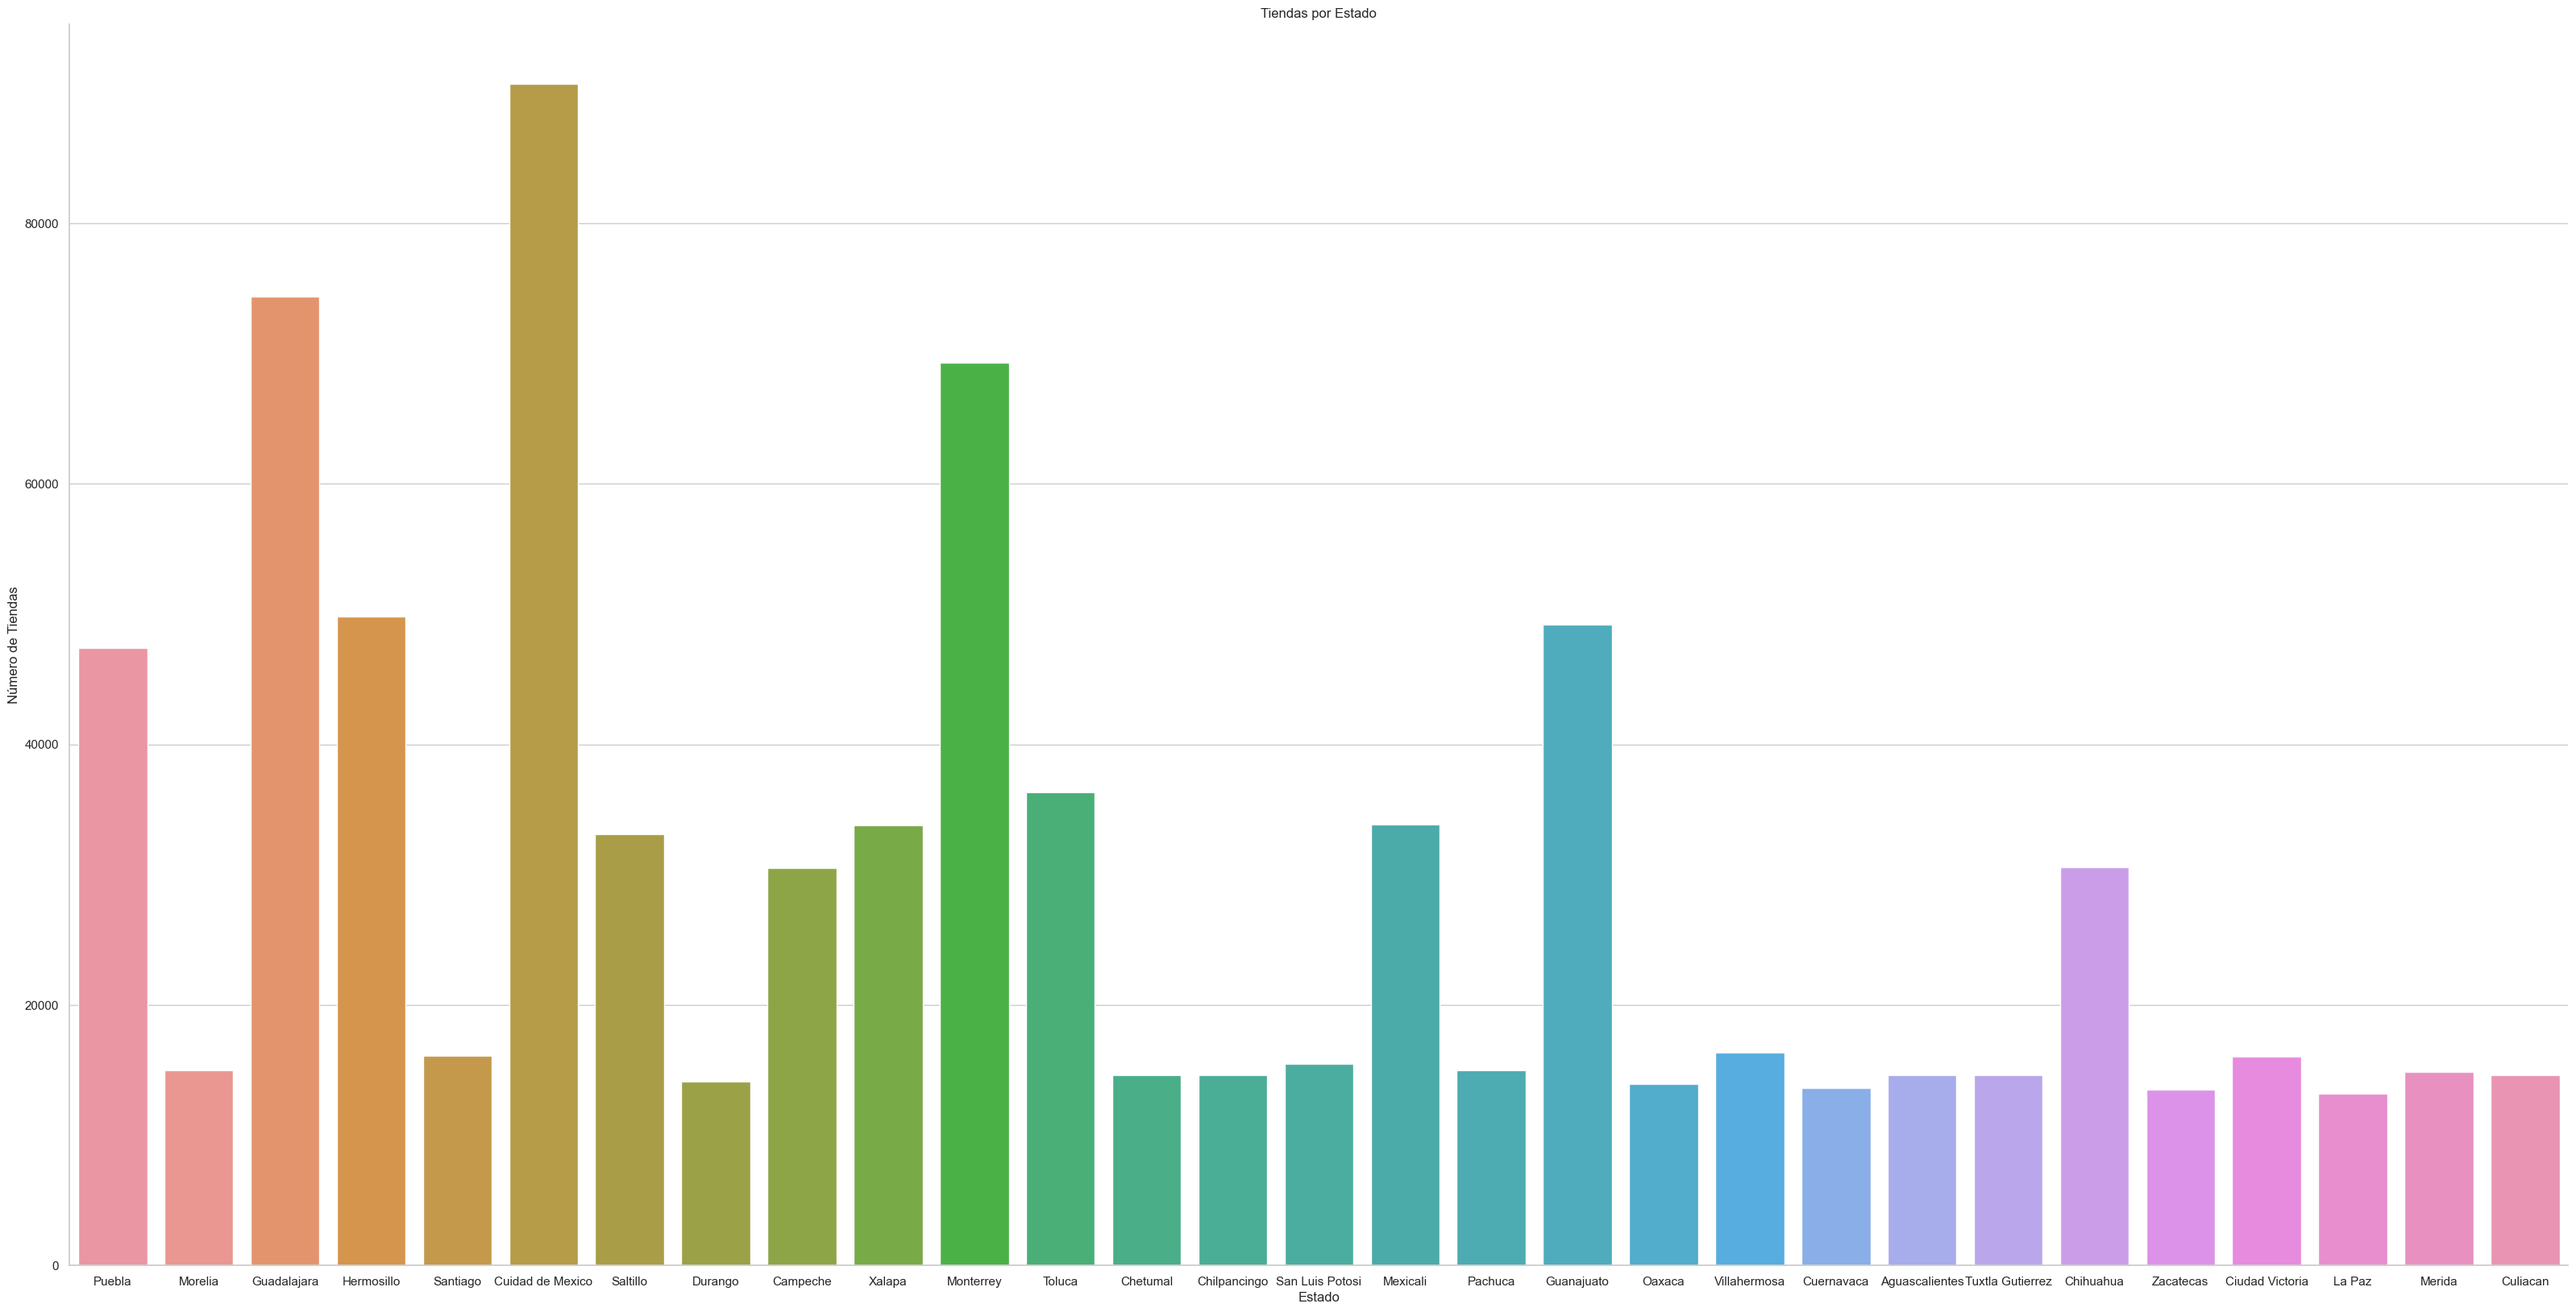

In [187]:
# graficar cuantas tiendas hay por estado

#ordenar de mayor a menor las tiendas por estado

plt.figure(figsize=(40, 20))
sns.countplot(x='Store_City', data=rentable)
plt.title('Tiendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Tiendas')

# Customize the plot appearance
sns.set(style='whitegrid')
sns.despine()

# Show the plot
plt.show()

Ciudad de México, Guadalajara y Monterrey son las que más tiendas tienen

In [188]:
#reemplazar $ por vacio en la columna Product_Cost y Product_Price
rentable['Product_Cost'] = rentable['Product_Cost'].str.replace('$', '')
rentable['Product_Price'] = rentable['Product_Price'].str.replace('$', '')

#pasar a numerico las columnas Product_Cost y Product_Price
rentable['Product_Cost'] = pd.to_numeric(rentable['Product_Cost'], errors='coerce')
rentable['Product_Price'] = pd.to_numeric(rentable['Product_Price'], errors='coerce')

#crear una columna nueva llamada ventas que sea el resultado de multiplicar las columnas Units y Product_Price
rentable['ventas'] = (rentable['Units']) * (rentable['Product_Price'])


#crear un dataset llamado estados que sea la agrupacion de rentable por Store_City y sumar las ventas
estados = rentable.groupby('Store_City')['ventas'].sum().reset_index(name='ventas')

#añadir a estados el numero de tiendas por estado
estados['numero de tiendas'] = rentable.groupby('Store_City')['Store_ID'].nunique().reset_index(name='numero de tiendas')['numero de tiendas']



C:\Users\Adolfo\AppData\Local\Temp\ipykernel_13820\327633055.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rentable['Product_Cost'] = rentable['Product_Cost'].str.replace('$', '')
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_13820\327633055.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rentable['Product_Price'] = rentable['Product_Price'].str.replace('$', '')


In [189]:
estados.head(30)

,Store_City,ventas,numero de tiendas
0,Aguascalientes,239997.35,1
1,Campeche,517841.67,2
2,Chetumal,258919.35,1
3,Chihuahua,516713.04,2
4,Chilpancingo,242539.73,1
5,Ciudad Victoria,294803.99,1
6,Cuernavaca,221587.26,1
7,Cuidad de Mexico,1649492.01,4
8,Culiacan,251160.91,1
9,Durango,222318.78,1


In [190]:
#crear un dataframe llamado TaskThree que agrupe rentable por Store_Name y sume las ventas 
TaskThree = rentable.groupby('Store_Name')['ventas'].sum().reset_index(name='ventas')
#Añadir el estado de cada tienda
TaskThree['Store_City'] = rentable.groupby('Store_Name')['Store_City'].first().reset_index(name='Store_City')['Store_City']
#añadir el numero de ventas por tienda
TaskThree.head(10)
#añadir cuando se fundo cada tienda
TaskThree['Store_Start_Date'] = rentable.groupby('Store_Name')['Store_Open_Date'].first().reset_index(name='Store_Open_Date')['Store_Open_Date']

In [191]:
TaskThree.head(10)

,Store_Name,ventas,Store_City,Store_Start_Date
0,Maven Toys Aguascalientes 1,239997.35,Aguascalientes,2010-07-31
1,Maven Toys Campeche 1,311786.44,Campeche,2005-01-14
2,Maven Toys Campeche 2,206055.23,Campeche,2010-09-15
3,Maven Toys Chetumal 1,258919.35,Chetumal,2006-05-05
4,Maven Toys Chihuahua 1,248008.30,Chihuahua,2010-06-12
5,Maven Toys Chihuahua 2,268704.74,Chihuahua,2014-03-18
6,Maven Toys Chilpancingo 1,242539.73,Chilpancingo,2013-06-11
7,Maven Toys Ciudad Victoria 1,294803.99,Ciudad Victoria,2010-09-08
8,Maven Toys Ciudad de Mexico 1,433556.21,Cuidad de Mexico,2004-10-15
9,Maven Toys Ciudad de Mexico 2,554553.43,Cuidad de Mexico,2012-05-04


In [192]:
#seleccionar la fecha minima de sales por tienda
TaskThree['fecha minima'] = rentable.groupby('Store_Name')['Date'].min().reset_index(name='Date')['Date']

#seleccionar la fecha maxima de sales por tienda
TaskThree['fecha maxima'] = rentable.groupby('Store_Name')['Date'].max().reset_index(name='Date')['Date']

#seleccionar el numero de productos por tienda
TaskThree['numero de productos'] = rentable.groupby('Store_Name')['Product_ID'].nunique().reset_index(name='Product_ID')['Product_ID']

#seleccionar el numero de ventas por tienda
TaskThree['numero de ventas'] = rentable.groupby('Store_Name')['Product_ID'].count().reset_index(name='Product_ID')['Product_ID']

#seleccionar el numero de unidades vendidas por tienda
TaskThree['numero de unidades vendidas'] = rentable.groupby('Store_Name')['Units'].sum().reset_index(name='Units')['Units']

#agregar el id de la tienda
TaskThree['Store_ID'] = rentable.groupby('Store_Name')['Store_ID'].first().reset_index(name='Store_ID')['Store_ID']

In [193]:
#Cambiar la fecha de inicio de la tienda a datetime
TaskThree['Store_Start_Date'] = pd.to_datetime(TaskThree['Store_Start_Date'])

#Cambiar la fecha minima de ventas a datetime
TaskThree['fecha minima'] = pd.to_datetime(TaskThree['fecha minima'])

#Cambiar la fecha maxima de ventas a datetime
TaskThree['fecha maxima'] = pd.to_datetime(TaskThree['fecha maxima'])

#Calcular la antiguedad de la tienda
TaskThree['antiguedad'] = TaskThree['fecha maxima'] - TaskThree['Store_Start_Date']

#Calcular la antiguedad de la tienda en años
TaskThree['antiguedad'] = (TaskThree['fecha maxima'] - TaskThree['Store_Start_Date']) / np.timedelta64(1, 'Y')


#restar la fecha minima de ventas a la fecha maxima de ventas
TaskThree['duracion'] = TaskThree['fecha maxima'] - TaskThree['fecha minima']

#Calcular la duracion de la tienda en años
TaskThree['duracion'] = (TaskThree['fecha maxima'] - TaskThree['fecha minima']) / np.timedelta64(1, 'Y')


TaskThree.head(10)

,Store_Name,ventas,Store_City,Store_Start_Date,fecha minima,fecha maxima,numero de productos,numero de ventas,numero de unidades vendidas,Store_ID,antiguedad,duracion
0,Maven Toys Aguascalientes 1,239997.35,Aguascalientes,2010-07-31,2017-01-01,2018-09-30,35,14588,17865,24,8.167177,1.744047
1,Maven Toys Campeche 1,311786.44,Campeche,2005-01-14,2017-01-01,2018-09-30,35,17695,24556,10,13.708700,1.744047
2,Maven Toys Campeche 2,206055.23,Campeche,2010-09-15,2017-01-02,2018-09-30,35,12805,16277,26,8.041233,1.741309
3,Maven Toys Chetumal 1,258919.35,Chetumal,2006-05-05,2017-01-01,2018-09-30,35,14644,18965,12,12.405457,1.744047
4,Maven Toys Chihuahua 1,248008.30,Chihuahua,2010-06-12,2017-01-01,2018-09-30,35,13998,18070,23,8.301334,1.744047
5,Maven Toys Chihuahua 2,268704.74,Chihuahua,2014-03-18,2017-01-01,2018-09-30,35,16580,22326,38,4.536712,1.744047
6,Maven Toys Chilpancingo 1,242539.73,Chilpancingo,2013-06-11,2017-01-01,2018-09-30,30,14592,18327,35,5.303326,1.744047
7,Maven Toys Ciudad Victoria 1,294803.99,Ciudad Victoria,2010-09-08,2017-01-01,2018-09-30,30,16034,20501,25,8.060398,1.744047
8,Maven Toys Ciudad de Mexico 1,433556.21,Cuidad de Mexico,2004-10-15,2017-01-01,2018-09-30,35,24482,33479,9,13.957850,1.744047
9,Maven Toys Ciudad de Mexico 2,554553.43,Cuidad de Mexico,2012-05-04,2017-01-01,2018-09-30,30,29024,42757,31,6.406702,1.744047


In [194]:
# Importar la librería necesaria
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar la codificación a la columna Store_City
TaskThree['Store_City_encoded'] = label_encoder.fit_transform(TaskThree['Store_City'])

# Imprimir los resultados
print(TaskThree[['Store_City', 'Store_City_encoded']].head())


       Store_City  Store_City_encoded
0  Aguascalientes                   0
1        Campeche                   1
2        Campeche                   1
3        Chetumal                   2
4       Chihuahua                   3


In [195]:
# Crear el conjunto de características (X) y la variable objetivo (y)
X = TaskThree[['antiguedad', 'numero de productos', 'numero de ventas' , 'Store_City_encoded']]
y = TaskThree['ventas']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [196]:
# Escalar las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [197]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=3)

In [198]:
y_pred = knn.predict(X_test_scaled)


In [199]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)


Error cuadrático medio (MSE): 1767348037.2588642
Coeficiente de determinación (R^2): 0.6525374335481439


In [200]:
import numpy as np
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores = result.importances_mean

# Get feature names
feature_names = X.columns

# Print feature importance scores
for feature, importance in zip(feature_names, importance_scores):
    print(f'Importancia de {feature}: {importance}')


Importancia de antiguedad: 0.03425301791178977
Importancia de numero de productos: 0.06550114467134352
Importancia de numero de ventas: 0.8978847902301158
Importancia de Store_City_encoded: 0.00530827785518404


Estos  valores de importancia indican que tanto la antigüedad como el número de productos tienen una influencia moderada, las ciudades y la antiguedad no tienen mucha importancia mientras que el número de ventas es el factor más relevante en la predicción de las ventas.

Eso quiere decir que no importa en que estado se abra una tienda, importa más que tengan más numeros de ventas y mejor surtido de productos

In [201]:
# Agrupar por trimestre y calcular la suma de utilidades
utilidades_por_trimestre = TaskFour.groupby('Quarter')['Utilities'].sum()

# Encontrar el trimestre con la utilidad máxima
trimestre_max_utilidades = utilidades_por_trimestre.idxmax()

# Obtener las utilidades del trimestre con la utilidad máxima
utilidades_max_trimestre = utilidades_por_trimestre.loc[trimestre_max_utilidades]

# Imprimir los resultados
print("Trimestre con más utilidades:", trimestre_max_utilidades)
print("Utilidades del trimestre:", utilidades_max_trimestre)

Trimestre con más utilidades: 2
Utilidades del trimestre: 45688472.0


---------------------

In [202]:
sales

,Sale_ID,Date,Store_ID,Product_ID,Units,Quarter
0,1,2017-01-01,24,4,1,1
1,2,2017-01-01,28,1,1,1
2,3,2017-01-01,6,8,1,1
3,4,2017-01-01,48,7,1,1
4,5,2017-01-01,44,18,1,1
...,...,...,...,...,...,...
829257,829258,2018-09-30,24,19,1,3
829258,829259,2018-09-30,16,35,1,3
829259,829260,2018-09-30,22,19,1,3
829260,829261,2018-09-30,13,2,2,3


In [203]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [204]:
salePro1 = pd.merge(stores, sales)

In [205]:
productnew = products
productnew['Product_Cost'] = productnew['Product_Cost'].replace({'\$': ''}, regex = True).astype(float)
productnew['Product_Price'] = productnew['Product_Price'].replace({'\$': ''}, regex = True).astype(float)
productnew['Product_Return'] = productnew['Product_Price'] - productnew['Product_Cost']
productnew['Return_Rate'] = round(productnew['Product_Return']/productnew['Product_Cost'], 3)
print('Product information')
productnew.head()

Product information


,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Utilities,percentage,utilidad_nivel,Product_Return,Return_Rate
0,1,Action Figure,Toys,9.99,15.99,6.0,37.523452,medio,6.0,0.601
1,2,Animal Figures,Toys,9.99,12.99,3.0,23.094688,bajo,3.0,0.300
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99,2.0,50.125313,medio,2.0,1.005
3,4,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,bajo,3.0,0.300
4,5,Classic Dominoes,Games,7.99,9.99,2.0,20.020020,bajo,2.0,0.250


In [206]:
salePro2 = pd.merge(salePro1, productnew, on = 'Product_ID')
saleProD = salePro2.drop(['Store_ID', 'Product_ID', 'Sale_ID','Store_Open_Date'], axis = 1)

In [207]:
salePro = saleProD.assign(TotalSales = saleProD['Product_Price'] * saleProD['Units'],
                          TotalProfit = saleProD['Product_Return'] * saleProD['Units'],
                          TotalCost = saleProD['Product_Cost'] * saleProD['Units'])


In [208]:
totalSale = salePro['TotalSales'].sum().round(1)
print('The total sales was', totalSale)

The total sales was 14444572.4


In [209]:
totalPro = salePro['TotalProfit'].sum().round(1)
print('The total profit was', totalPro)

The total profit was 4014029.0


In [210]:
totalCost = salePro['TotalCost'].sum().round(1)
RR = round(totalPro/totalCost, 3)
print('The total return rate was', RR)

The total return rate was 0.385


In [211]:
saleMon1 = salePro[['Date', 'TotalSales', 'TotalProfit']]
saleMon = saleMon1.groupby(pd.Grouper(key='Date', axis=0, freq='M')).sum()
saleMon.head()


,TotalSales,TotalProfit
Date,,
2017-01-31,542554.91,167126.0
2017-02-28,541351.65,161861.0
2017-03-31,589485.19,173992.0
2017-04-30,681072.98,190099.0
2017-05-31,672369.90,186894.0


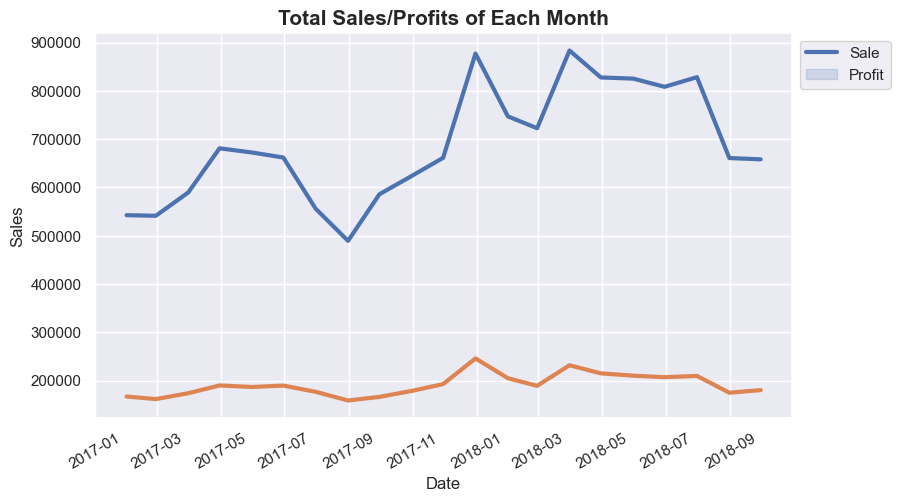

In [212]:
sns.set(rc={"figure.figsize":(9, 5)}) 
sns.lineplot(x = 'Date', y = 'TotalSales', data = saleMon, lw = 3)
sns.lineplot(x = 'Date', y = 'TotalProfit', data = saleMon, lw = 3)
plt.title('Total Sales/Profits of Each Month', size = 15, weight = 700)
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation = 30)
plt.legend(labels = ['Sale', 'Profit'], bbox_to_anchor = (1, 1))

In [213]:
print('Time with the highest sales')
print(saleMon[saleMon.TotalSales == saleMon.TotalSales.max()])
print('\n\nTime with the highest profit')
print(saleMon[saleMon.TotalProfit == saleMon.TotalProfit.max()])

Time with the highest sales
            TotalSales  TotalProfit
Date                               
2018-03-31   883515.64     231909.0


Time with the highest profit
            TotalSales  TotalProfit
Date                               
2017-12-31   877203.69     246078.0


In [214]:
saleCatMon1 = salePro[['Date', 'TotalSales', 'TotalProfit', 'Product_Category']]
saleCatMon = saleCatMon1.groupby([pd.Grouper(key='Date', axis=0, freq='M'), 'Product_Category']).sum()


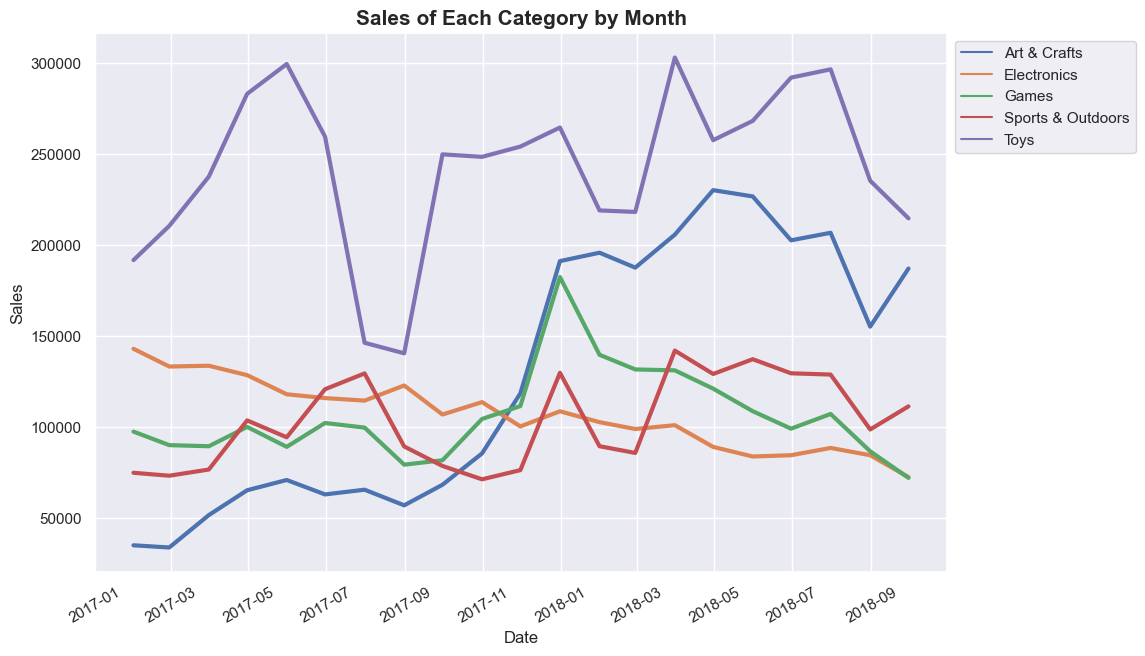

In [215]:
sns.set(rc={"figure.figsize":(11, 7)}) 
sns.lineplot(x = 'Date', y = 'TotalSales', data = saleCatMon, hue = 'Product_Category', lw = 3)
plt.title('Sales of Each Category by Month', size = 15, weight = 700)
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1, 1))

In [216]:
saleCatMon

TotalSales  TotalProfit
Date       Product_Category                          
2017-01-31 Art & Crafts         35097.18       9928.0
           Electronics         143088.62      69020.0
           Games                97575.98      28308.0
           Sports & Outdoors    74945.88      19409.0
           Toys                191847.25      40461.0
...                                  ...          ...
2018-09-30 Art & Crafts        187229.64      60048.0
           Electronics          72547.18      29194.0
           Games                72150.89      20522.0
           Sports & Outdoors   111463.54      27245.0
           Toys                214803.23      43436.0

[105 rows x 2 columns]

In [217]:
#acceder a la columna Date 
saleCatMon['Date'] = saleCatMon.index.get_level_values('Date')
#accder a la columna Product_Category
saleCatMon['Product_Category'] = saleCatMon.index.get_level_values('Product_Category')

In [218]:
saleCatMon

TotalSales  TotalProfit       Date  \
Date       Product_Category                                        
2017-01-31 Art & Crafts         35097.18       9928.0 2017-01-31   
           Electronics         143088.62      69020.0 2017-01-31   
           Games                97575.98      28308.0 2017-01-31   
           Sports & Outdoors    74945.88      19409.0 2017-01-31   
           Toys                191847.25      40461.0 2017-01-31   
...                                  ...          ...        ...   
2018-09-30 Art & Crafts        187229.64      60048.0 2018-09-30   
           Electronics          72547.18      29194.0 2018-09-30   
           Games                72150.89      20522.0 2018-09-30   
           Sports & Outdoors   111463.54      27245.0 2018-09-30   
           Toys                214803.23      43436.0 2018-09-30   

                               Product_Category  
Date       Product_Category                      
2017-01-31 Art & Crafts            Art & Crafts  
           Electronics              Electronics  
           Games                          Games  
           Sports & Outdoors  Sports & Outdoors  
           Toys                            Toys  
...                                         ...  
2018-09-30 Art & Crafts            Art & Crafts  
           Electronics              Electronics  
           Games                          Games  
           Sports & Outdoors  Sports & Outdoors  
           Toys                            Toys  

[105 rows x 4 columns]

In [219]:
# Cargar los datos en un dataframe
df = saleCatMon

In [220]:
saleCatMon

TotalSales  TotalProfit       Date  \
Date       Product_Category                                        
2017-01-31 Art & Crafts         35097.18       9928.0 2017-01-31   
           Electronics         143088.62      69020.0 2017-01-31   
           Games                97575.98      28308.0 2017-01-31   
           Sports & Outdoors    74945.88      19409.0 2017-01-31   
           Toys                191847.25      40461.0 2017-01-31   
...                                  ...          ...        ...   
2018-09-30 Art & Crafts        187229.64      60048.0 2018-09-30   
           Electronics          72547.18      29194.0 2018-09-30   
           Games                72150.89      20522.0 2018-09-30   
           Sports & Outdoors   111463.54      27245.0 2018-09-30   
           Toys                214803.23      43436.0 2018-09-30   

                               Product_Category  
Date       Product_Category                      
2017-01-31 Art & Crafts            Art & Crafts  
           Electronics              Electronics  
           Games                          Games  
           Sports & Outdoors  Sports & Outdoors  
           Toys                            Toys  
...                                         ...  
2018-09-30 Art & Crafts            Art & Crafts  
           Electronics              Electronics  
           Games                          Games  
           Sports & Outdoors  Sports & Outdoors  
           Toys                            Toys  

[105 rows x 4 columns]

In [221]:
#pasar la columna Date a numerica
df['Date'] = pd.to_numeric(df['Date'])

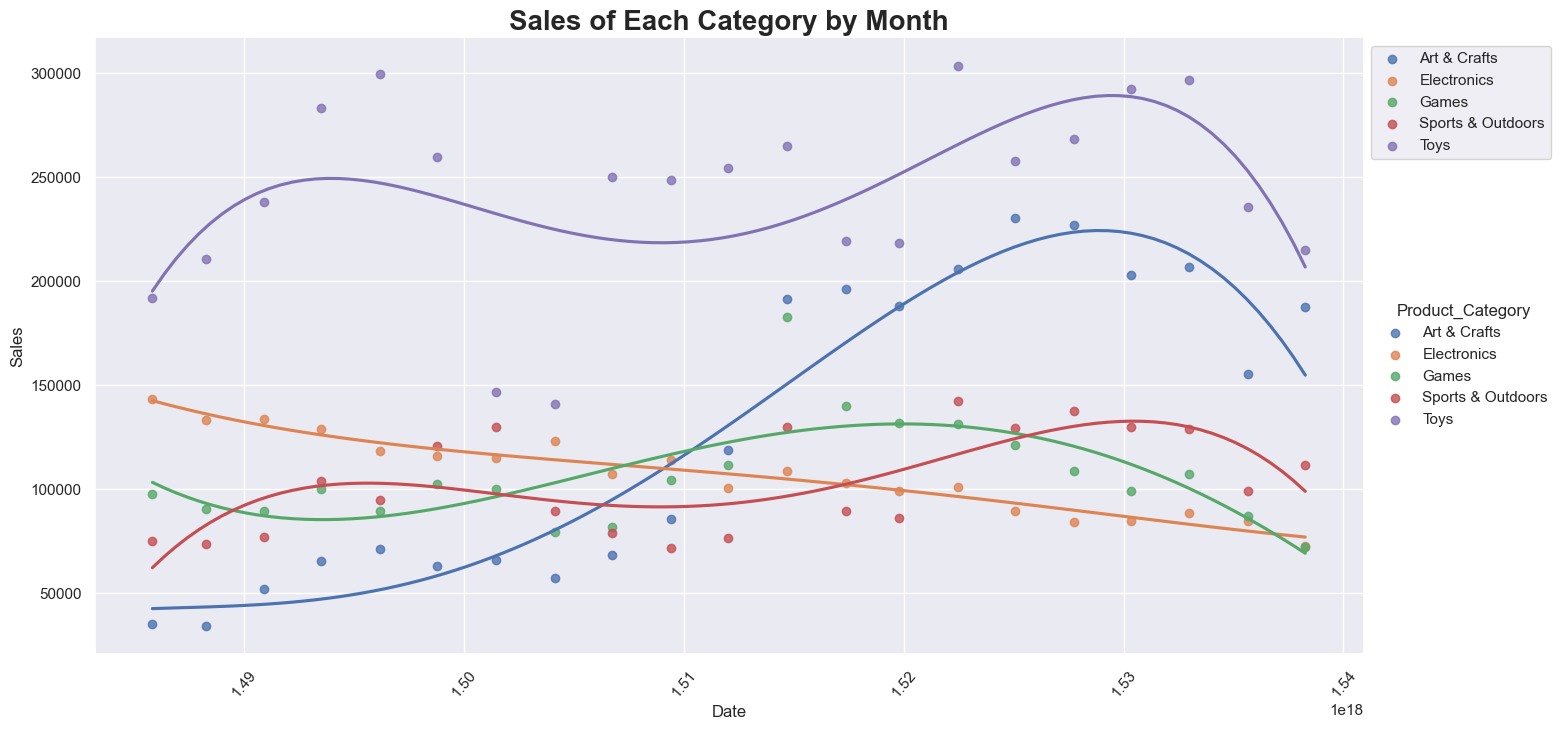

In [222]:
#crear una regresion lineal para cada categoria de producto
sns.lmplot(x='Date', y='TotalSales', data=df, hue='Product_Category', height=7, aspect=2, ci=None, order=4)
plt.title('Sales of Each Category by Month', size = 20, weight = 700)
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation = 50)
plt.legend(bbox_to_anchor = (1, 1))




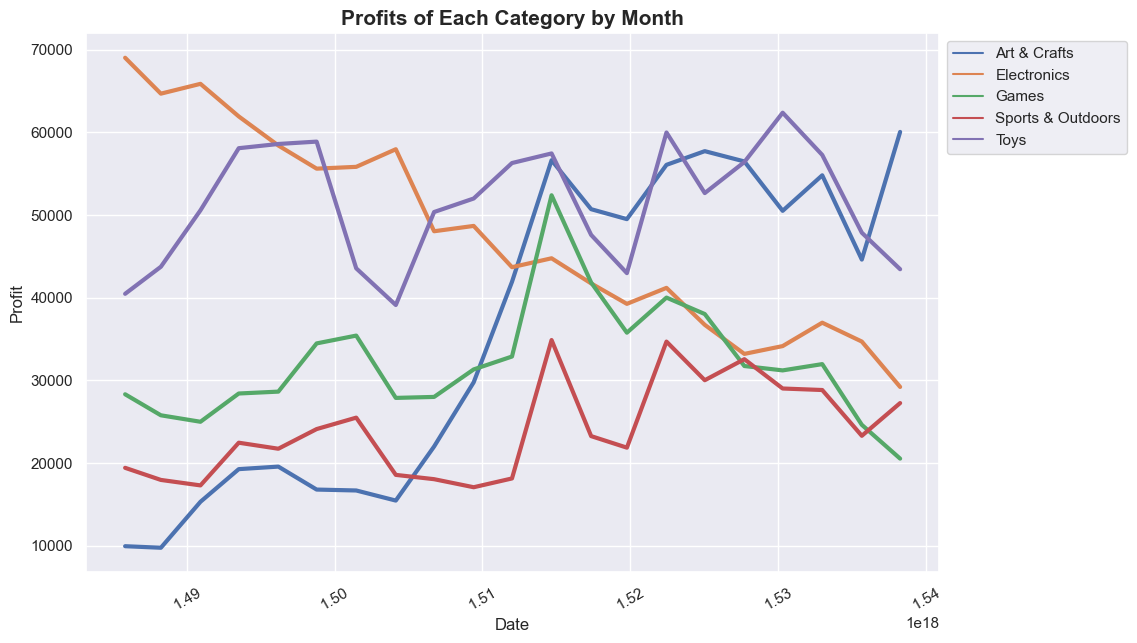

In [223]:
sns.set(rc={"figure.figsize":(11, 7)}) 
sns.lineplot(x = 'Date', y = 'TotalProfit', data = saleCatMon, hue = 'Product_Category', lw = 3)
plt.title('Profits of Each Category by Month', size = 15, weight = 700)
plt.ylabel('Profit')
plt.xlabel('Date')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1, 1))

In [224]:
storesale = (salePro[['Store_Name', 'TotalSales', 'TotalProfit', 'TotalCost']]
             .groupby('Store_Name')
             .agg(StoreTotSale=('TotalSales', 'sum'),
                  StoreTotProfit=('TotalProfit', 'sum'),
                  StoreTotCost=('TotalCost', 'sum'))
             .round(1)
             .reset_index()
             .assign(Perc=lambda x: (x['StoreTotProfit'] / x['StoreTotCost']).round(3))
             .sort_values('Perc', ascending=False))
             
print('Sale information of each store\n')
storesale.head(10)


Sale information of each store



,Store_Name,StoreTotSale,StoreTotProfit,StoreTotCost,Perc
33,Maven Toys Morelia 1,273060.0,90484.0,182576.0,0.496
27,Maven Toys Mexicali 1,294019.4,97206.0,196813.4,0.494
22,Maven Toys Hermosillo 1,235115.2,76788.0,158327.2,0.485
9,Maven Toys Ciudad de Mexico 2,554553.4,169856.0,384697.4,0.442
31,Maven Toys Monterrey 3,285814.2,86622.0,199192.2,0.435
36,Maven Toys Puebla 1,258533.9,75942.0,182591.9,0.416
38,Maven Toys Puebla 3,267559.6,78670.0,188889.6,0.416
18,Maven Toys Guadalajara 4,348466.6,102178.0,246288.6,0.415
16,Maven Toys Guadalajara 2,262435.0,75752.0,186683.0,0.406
5,Maven Toys Chihuahua 2,268704.7,77263.0,191441.7,0.404


In [225]:
TopSaleStore = storesale[storesale.StoreTotSale == storesale.StoreTotSale.max()]
print('The store had the highest sale')
TopSaleStore

The store had the highest sale


,Store_Name,StoreTotSale,StoreTotProfit,StoreTotCost,Perc
9,Maven Toys Ciudad de Mexico 2,554553.4,169856.0,384697.4,0.442


In [226]:
TopProStore = storesale[storesale.StoreTotProfit == storesale.StoreTotProfit.max()]
print('The store had the higest profit')
TopProStore

The store had the higest profit


,Store_Name,StoreTotSale,StoreTotProfit,StoreTotCost,Perc
9,Maven Toys Ciudad de Mexico 2,554553.4,169856.0,384697.4,0.442


In [227]:
TopReStore = storesale.head(1)
print('The store had the highest return rate')
TopReStore

The store had the highest return rate


,Store_Name,StoreTotSale,StoreTotProfit,StoreTotCost,Perc
33,Maven Toys Morelia 1,273060.0,90484.0,182576.0,0.496


In [228]:
CitySale = (salePro[['Store_City', 'TotalProfit', 'TotalCost', 'TotalSales']]
            .groupby('Store_City')
            .agg(Cost=('TotalCost', 'sum'),
                 Sale=('TotalSales', 'sum'),
                 Profit=('TotalProfit', 'sum'))
            .round(1)
            .reset_index()
            .assign(Return_Rate=lambda x: (x['Profit'] / x['Cost']).round(3)))

print('Sale information by cities')
(CitySale).head(10)


Sale information by cities


,Store_City,Cost,Sale,Profit,Return_Rate
0,Aguascalientes,171355.4,239997.4,68642.0,0.401
1,Campeche,371502.7,517841.7,146339.0,0.394
2,Chetumal,190979.4,258919.4,67940.0,0.356
3,Chihuahua,369845.0,516713.0,146868.0,0.397
4,Chilpancingo,175981.7,242539.7,66558.0,0.378
5,Ciudad Victoria,211716.0,294804.0,83088.0,0.392
6,Cuernavaca,164776.3,221587.3,56811.0,0.345
7,Cuidad de Mexico,1183934.0,1649492.0,465558.0,0.393
8,Culiacan,187201.9,251160.9,63959.0,0.342
9,Durango,159645.8,222318.8,62673.0,0.393


In [229]:
print('The city had the lowest sales')
CitySale.sort_values(by = ['Sale']).head(1)

The city had the lowest sales


,Store_City,Cost,Sale,Profit,Return_Rate
13,La Paz,153490.8,210897.8,57407.0,0.374


In [230]:
print('The city had the highest sales')
CitySale.sort_values(by = ['Sale']).tail(1)

The city had the highest sales


,Store_City,Cost,Sale,Profit,Return_Rate
7,Cuidad de Mexico,1183934.0,1649492.0,465558.0,0.393


In [231]:
print('The city had the lowest profit value')
CitySale.sort_values(by = ['Profit']).head(1)

The city had the lowest profit value


,Store_City,Cost,Sale,Profit,Return_Rate
6,Cuernavaca,164776.3,221587.3,56811.0,0.345


In [232]:
print('The city had the highest profit value')
CitySale.sort_values(by = ['Profit']).tail(1)

The city had the highest profit value


,Store_City,Cost,Sale,Profit,Return_Rate
7,Cuidad de Mexico,1183934.0,1649492.0,465558.0,0.393


In [233]:
print('The city had lowest return rate')
CitySale.sort_values(by = ['Return_Rate']).head(1)

The city had lowest return rate


,Store_City,Cost,Sale,Profit,Return_Rate
18,Oaxaca,182536.4,242154.4,59618.0,0.327


In [234]:
print('The city had the highest return rate')
CitySale.sort_values(by = ['Return_Rate']).tail(1)

The city had the highest return rate


,Store_City,Cost,Sale,Profit,Return_Rate
17,Morelia,182576.0,273060.0,90484.0,0.496


In [235]:
#importar sales.csv 
sales = pd.read_csv('./sales.csv')

sales.head(3)

#unir sales con products por la columna Product_ID
sales_products = pd.merge(sales, products, on='Product_ID')
sales_products.head(3)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Utilities,percentage,utilidad_nivel,Product_Return,Return_Rate
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,bajo,3.0,0.3
1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,bajo,3.0,0.3
2,80,2017-01-01,7,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,bajo,3.0,0.3


In [236]:
# Convertir la columna 'Date' en tipo datetime
sales_products['Date'] = pd.to_datetime(sales_products['Date'])

# Calcular el total vendido por día
df_daily_sales = sales_products.groupby('Date').apply(lambda x: (x['Units'] * x['Product_Price']).sum())



In [237]:
#pasar a dataframe df_daily_sales
df_daily_sales = pd.DataFrame(df_daily_sales)

In [238]:
df_daily_sales['Date'] = df_daily_sales.index

In [239]:
df_daily_sales

,0,Date
Date,,
2017-01-01,21076.15,2017-01-01
2017-01-02,19750.94,2017-01-02
2017-01-03,11759.50,2017-01-03
2017-01-04,14814.40,2017-01-04
2017-01-05,19791.30,2017-01-05
...,...,...
2018-09-26,15518.49,2018-09-26
2018-09-27,18351.04,2018-09-27
2018-09-28,25940.93,2018-09-28


In [240]:
#cambiar el nombre de la columna 0 a Total
df_daily_sales.rename(columns={0: 'Total'}, inplace=True)

In [241]:
df_daily_sales

,Total,Date
Date,,
2017-01-01,21076.15,2017-01-01
2017-01-02,19750.94,2017-01-02
2017-01-03,11759.50,2017-01-03
2017-01-04,14814.40,2017-01-04
2017-01-05,19791.30,2017-01-05
...,...,...
2018-09-26,15518.49,2018-09-26
2018-09-27,18351.04,2018-09-27
2018-09-28,25940.93,2018-09-28


In [242]:
# Convertir la columna 'Date' en tipo datetime
df_daily_sales['Date'] = pd.to_datetime(df_daily_sales['Date'])

# Calcular el promedio diario de ventas
daily_average = df_daily_sales['Total'].mean()

# Calcular el tiempo estimado en días para vender 10,000 pesos
estimated_time = 10000 / daily_average

print('El tiempo estimado en días para vender 10,000 pesos es:', estimated_time)

El tiempo estimado en días para vender 10,000 pesos es: 0.4416883965415563


In [243]:
df_daily_sales

,Total,Date
Date,,
2017-01-01,21076.15,2017-01-01
2017-01-02,19750.94,2017-01-02
2017-01-03,11759.50,2017-01-03
2017-01-04,14814.40,2017-01-04
2017-01-05,19791.30,2017-01-05
...,...,...
2018-09-26,15518.49,2018-09-26
2018-09-27,18351.04,2018-09-27
2018-09-28,25940.93,2018-09-28


-------------------------

# TERCER HALLAZGO

### ¿Cuáles son los 20 mejores productos en cuestión de utilidades y ventas en el estado de Puebla?

El cliente quiere abrir una tienda en un estado especifico , quiere tener las mejores utilidades pero es una tienda pequeña por lo que solo podra tener 20 productos de los 50 que tiene en inventario. 

Seleccionemos los mejores productos para vender y hagamos un cluster con tres grupos y visualicemos la informacion

In [ ]:
sales = pd.read_csv('./sales.csv')
products = pd.read_csv('./products.csv')
stores = pd.read_csv('./stores.csv')

#Reemplazar $ por vacio en la columna Product_Cost y Product_Price
products['Product_Cost'] = products['Product_Cost'].str.replace('$', '')
products['Product_Price'] = products['Product_Price'].str.replace('$', '')


#Convertir las columnas Product_Cost y Product_Price a numericas
products['Product_Cost'] = pd.to_numeric(products['Product_Cost'], errors='coerce')
products['Product_Price'] = pd.to_numeric(products['Product_Price'], errors='coerce')

#En la tabla products , crear una nueva columna llamada "Utilities" que sea el resultado de la resta de las columnas Product_Price y Product_Cost
products['Utilities'] = (products['Product_Price']) - (products['Product_Cost'])
GrupoUtilidades = products

#Crear una columna llamada "percentage" que sea el porcentaje de utilidad de cada producto
GrupoUtilidades['percentage'] = (GrupoUtilidades['Utilities'] / GrupoUtilidades['Product_Price']) * 100

GrupoUtilidades.head(10)

#unir sales con products por la columna Product_ID y con stores por la columna Store_ID
sales_products = pd.merge(sales, products, on='Product_ID')
sales_products_stores = pd.merge(sales_products, stores, on='Store_ID')



C:\Users\Adolfo\AppData\Local\Temp\ipykernel_13820\1017750203.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  products['Product_Cost'] = products['Product_Cost'].str.replace('$', '')
C:\Users\Adolfo\AppData\Local\Temp\ipykernel_13820\1017750203.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  products['Product_Price'] = products['Product_Price'].str.replace('$', '')


In [ ]:
sales_products_stores

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Utilities,percentage,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
2,98,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
3,128,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
4,146,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,23.094688,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,793189,2018-09-04,13,28,1,Playfoam,Art & Crafts,3.99,10.99,7.0,63.694268,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30
829258,820255,2018-09-25,13,28,1,Playfoam,Art & Crafts,3.99,10.99,7.0,63.694268,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30
829259,820290,2018-09-25,13,28,1,Playfoam,Art & Crafts,3.99,10.99,7.0,63.694268,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30
829260,820877,2018-09-25,13,28,1,Playfoam,Art & Crafts,3.99,10.99,7.0,63.694268,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30


Vamos a analizar el estado de Puebla

In [ ]:
# Filtrar los datos para el estado de Puebla
df_puebla = sales_products_stores[sales_products_stores['Store_City'] == 'Puebla']

# Agrupar por tienda y calcular las utilidades totales y el número total de ventas
tiendas_utilidades_ventas = df_puebla.groupby('Store_Name').agg({'Utilities': 'sum', 'Units': 'sum'}).reset_index()

# Ordenar las tiendas por utilidades de forma descendente y ventas de forma ascendente
tiendas_utilidades_ventas = tiendas_utilidades_ventas.sort_values(by=['Utilities', 'Units'], ascending=[False, True])

# Seleccionar la tienda con las mayores utilidades y el menor número de ventas
mejor_tienda = tiendas_utilidades_ventas.iloc[0]

# Mostrar los resultados
print(mejor_tienda)


Store_Name    Maven Toys Puebla 1
Utilities                 62397.0
Units                       19413
Name: 0, dtype: object


In [ ]:
# Filtrar los datos para el estado de Puebla
df_puebla = sales_products_stores[sales_products_stores['Store_City'] == 'Puebla']

# Agrupar por producto y calcular el porcentaje promedio de utilidad y el número total de ventas
productos_utilidad = df_puebla.groupby('Product_Name').agg({'percentage': 'mean', 'Units': 'sum'}).reset_index()

# Ordenar los productos por porcentaje de utilidad de forma descendente
productos_utilidad = productos_utilidad.sort_values(by='percentage', ascending=False)

# Obtener los 20 productos con los porcentajes más altos de utilidad
top_productos_utilidad = productos_utilidad

# DataFrame con los precios de los productos
precios_productos = pd.DataFrame({
    'Product_Name': [
        'Action Figure', 'Animal Figures', "Barrel O' Slime", 'Chutes & Ladders', 'Classic Dominoes',
        'Colorbuds', 'Dart Gun', 'Deck Of Cards', 'Dino Egg', 'Dinosaur Figures',
        'Etch A Sketch', 'Foam Disk Launcher', 'Gamer Headphones', 'Glass Marbles', 'Hot Wheels 5-Pack',
        'Jenga', 'Kids Makeup Kit', 'Lego Bricks', 'Magic Sand', 'Mini Basketball Hoop',
        'Mini Ping Pong Set', 'Monopoly', 'Mr. Potatohead', 'Nerf Gun', 'PlayDoh Can',
        'PlayDoh Playset', 'PlayDoh Toolkit', 'Playfoam', 'Plush Pony', "Rubik's Cube",
        'Splash Balls', 'Supersoaker Water Gun', 'Teddy Bear', 'Toy Robot', 'Uno Card Game'
    ],
    'Product_Price': [
        15.99, 12.99, 3.99, 12.99, 9.99,
        14.99, 15.99, 6.99, 10.99, 14.99,
        20.99, 11.99, 20.99, 10.99, 5.99,
        9.99, 19.99, 39.99, 15.99, 24.99,
        9.99, 19.99, 9.99, 19.99, 2.99,
        24.99, 4.99, 10.99, 19.99, 19.99,
        8.99, 14.99, 12.99, 25.99, 7.99
    ]
})

# Combinar el DataFrame top_productos_utilidad con los precios de los productos
top_productos_utilidad_con_precio = pd.merge(top_productos_utilidad, precios_productos, on='Product_Name')

# Mostrar los resultados
print(top_productos_utilidad_con_precio)


             Product_Name  percentage  Units  Product_Price
0                   Jenga   70.070070    674           9.99
1    Mini Basketball Hoop   64.025610     60          24.99
2                Playfoam   63.694268    146          10.99
3              Plush Pony   55.027514    311          19.99
4               Colorbuds   53.368913   6496          14.99
5         Barrel O' Slime   50.125313   6262           3.99
6           Uno Card Game   50.062578     70           7.99
7          Mr. Potatohead   50.050050    452           9.99
8           Etch A Sketch   47.641734    727          20.99
9           Glass Marbles   45.495905   1882          10.99
10          Deck Of Cards   42.918455   5268           6.99
11          Action Figure   37.523452   3651          15.99
12            PlayDoh Can   33.444816   5877           2.99
13      Hot Wheels 5-Pack   33.388982   1319           5.99
14     Mini Ping Pong Set   30.030030    418           9.99
15               Monopoly   30.015008   

In [ ]:
#total de ventas en el estado de Puebla 
total_ventas_puebla = sales_products_stores[sales_products_stores['Store_City'] == 'Puebla']['Units'].sum()
total_ventas_puebla

61171

In [ ]:
#calcular el porcentaje de probabilidad de que un producto se venda en Puebla
top_productos_utilidad_con_precio['probabilidad'] = top_productos_utilidad_con_precio['Units'] / total_ventas_puebla


#pasar a dataframe top_productos_utilidad
top_productos_utilidad_con_precio = pd.DataFrame(top_productos_utilidad_con_precio)

top_productos_utilidad_con_precio

,Product_Name,percentage,Units,Product_Price,probabilidad
0,Jenga,70.070070,674,9.99,0.011018
1,Mini Basketball Hoop,64.025610,60,24.99,0.000981
2,Playfoam,63.694268,146,10.99,0.002387
3,Plush Pony,55.027514,311,19.99,0.005084
4,Colorbuds,53.368913,6496,14.99,0.106194
5,Barrel O' Slime,50.125313,6262,3.99,0.102369
6,Uno Card Game,50.062578,70,7.99,0.001144
7,Mr. Potatohead,50.050050,452,9.99,0.007389
8,Etch A Sketch,47.641734,727,20.99,0.011885
9,Glass Marbles,45.495905,1882,10.99,0.030766


In [ ]:
# Seleccionar las columnas relevantes para el clustering
features = ['percentage', 'Units', 'Product_Price']
data_cluster = top_productos_utilidad_con_precio[features]

# Escalar los datos para asegurar que todas las características tengan el mismo rango
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Aplicar el algoritmo de K-means para determinar los clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)

# Agregar la columna 'Cluster' al DataFrame original
top_productos_utilidad_con_precio['Cluster'] = kmeans.labels_



c:\Users\Adolfo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Mostrar los resultados
(top_productos_utilidad_con_precio)

,Product_Name,percentage,Units,Product_Price,probabilidad,Cluster
0,Jenga,70.070070,674,9.99,0.011018,0
1,Mini Basketball Hoop,64.025610,60,24.99,0.000981,0
2,Playfoam,63.694268,146,10.99,0.002387,0
3,Plush Pony,55.027514,311,19.99,0.005084,0
4,Colorbuds,53.368913,6496,14.99,0.106194,2
5,Barrel O' Slime,50.125313,6262,3.99,0.102369,2
6,Uno Card Game,50.062578,70,7.99,0.001144,0
7,Mr. Potatohead,50.050050,452,9.99,0.007389,0
8,Etch A Sketch,47.641734,727,20.99,0.011885,0
9,Glass Marbles,45.495905,1882,10.99,0.030766,0


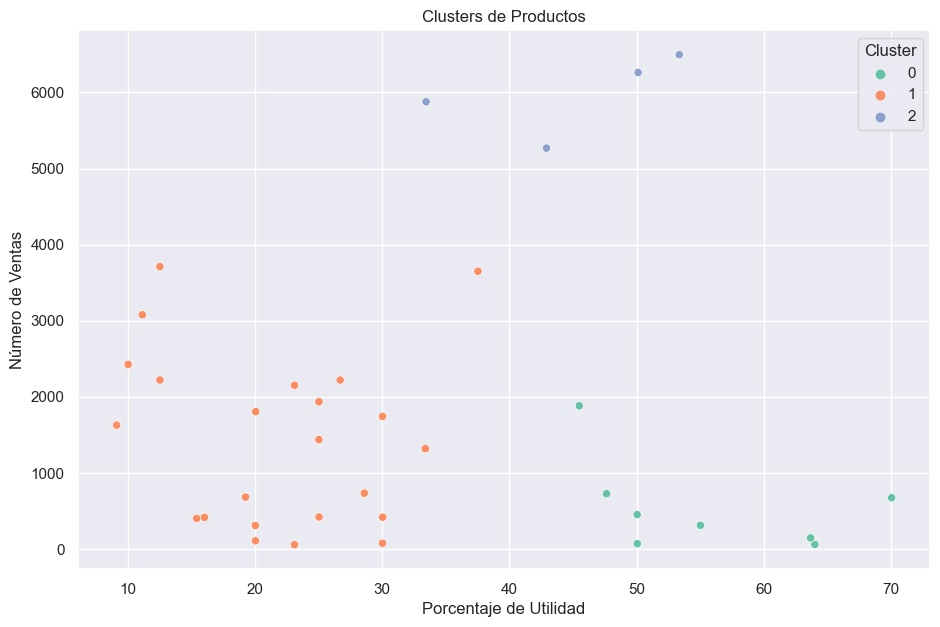

In [ ]:
#graficar los clusters
sns.scatterplot(x='percentage', y='Units', data=top_productos_utilidad_con_precio, hue='Cluster', palette='Set2')
plt.title('Clusters de Productos')
plt.xlabel('Porcentaje de Utilidad')
plt.ylabel('Número de Ventas')
plt.show()


Entonces obtenemos tres grupos (0) donde se encuentran los productos con alta utilidad pero bajas ventas , (1) productos con bajas ventas y bajo porcentaje de utilidad y (2) productos con altas ventas y alta utilidad 

In [ ]:
#mostrar 3 productos del cluster 0
top_productos_utilidad_con_precio[top_productos_utilidad_con_precio['Cluster'] == 0].head(3)

,Product_Name,percentage,Units,Product_Price,probabilidad,Cluster
0,Jenga,70.070070,674,9.99,0.011018,0
1,Mini Basketball Hoop,64.025610,60,24.99,0.000981,0
2,Playfoam,63.694268,146,10.99,0.002387,0


In [ ]:
#mostrar 3 productos del cluster 1

top_productos_utilidad_con_precio[top_productos_utilidad_con_precio['Cluster'] == 1].head(3)


,Product_Name,percentage,Units,Product_Price,probabilidad,Cluster
11,Action Figure,37.523452,3651,15.99,0.059685,1
13,Hot Wheels 5-Pack,33.388982,1319,5.99,0.021563,1
14,Mini Ping Pong Set,30.030030,418,9.99,0.006833,1


In [ ]:

#mostrar 3 productos del cluster 2

top_productos_utilidad_con_precio[top_productos_utilidad_con_precio['Cluster'] == 2].head(3)

,Product_Name,percentage,Units,Product_Price,probabilidad,Cluster
4,Colorbuds,53.368913,6496,14.99,0.106194,2
5,Barrel O' Slime,50.125313,6262,3.99,0.102369,2
10,Deck Of Cards,42.918455,5268,6.99,0.086119,2


In [ ]:
# ordenar por cluster (top_productos_utilidad_con_precio) y mostrar los primeros 20 productos

top_productos_utilidad_con_precio.sort_values(by='Cluster', ascending=False).head(20)

,Product_Name,percentage,Units,Product_Price,probabilidad,Cluster
4,Colorbuds,53.368913,6496,14.99,0.106194,2
5,Barrel O' Slime,50.125313,6262,3.99,0.102369,2
12,PlayDoh Can,33.444816,5877,2.99,0.096075,2
10,Deck Of Cards,42.918455,5268,6.99,0.086119,2
17,Gamer Headphones,28.585040,734,20.99,0.011999,1
27,Toy Robot,19.238169,682,25.99,0.011149,1
22,Animal Figures,23.094688,2152,12.99,0.035180,1
23,Chutes & Ladders,23.094688,57,12.99,0.000932,1
24,PlayDoh Toolkit,20.040080,1805,4.99,0.029507,1
25,Classic Dominoes,20.020020,108,9.99,0.001766,1
